# Model of mid school in 2020

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [3]:
df = pd.read_csv('../data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [6]:
df["POB_VICT_CONF"].value_counts()

99    442309
1      13545
10       409
3        245
9        187
4        126
2         97
18        68
17        40
7          5
20         5
6          4
12         2
15         2
8          1
13         1
21         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,0,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,0,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [12]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [13]:
df = df[(df['NIVEL']== 3)]

In [14]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [15]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [16]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.939849
1    0.060151
Name: REPITENTE, dtype: float64

In [17]:
df['REPITENTE'].value_counts()

0    171122
1     10952
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
              Category        p-value
3    DIR_NUM_LOCALIDAD  1.300278e-130
0               GENERO   1.819574e-73
2       CODIGO_JORNADA   4.162833e-46
6           computador   4.326255e-21
5              teneviv   1.327500e-15
4  todos_servicios_Pub   1.299504e-10
1         CODIGO_ETNIA   3.257573e-03
7           tiene_auto   4.615193e-03


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(182074,)

In [22]:
X = df[variables]
X.shape

(182074, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                            GLM   Df Residuals:                   182060
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38263.
Date:                Wed, 06 Jul 2022   Deviance:                       76527.
Time:                        23:28:58   Pearson chi2:                 1.68e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1481      0.008     19.030      0.000       0.133       0.163
estrato                      -0.0785      0.017     -4.609      0.000      -0.112      -0.045
puntaje_sisben_3             -0.0015      0.001     -2.060      0.039      -0.003   -7.12e-05
indice_hacinamiento           0.0333      0.009      3.768      0.000       0.016       0.051
TOTAL_EQUIPO_COMPUTO      -3.522e-05   7.06e-05     -0.499      0.618      -0.000       0.000
ALUMN_POR_DOCENTE            -0.0036      0.003     -1.394      0.163      -0.009       0.001
COMPU_POR_ALUMN               0.3113      0.083      3.729      0.000       0.148       0.475
TOTAL_DOCENTES_CON_TITULO     0.0010      0.000      2.830      0.005       0.000       0.002
PROP_DOCENTES_CON_TITULO      0.4321      0.049      8.891      0.000       0.337       0.527
promepuntaje                 -0.0032      0.001     -4.071      0.000      -0.005      -0.002
GRADO_OVERAGE                 0.0668      0.001     47.335      0.000       0.064       0.070
nparentes                     0.0013      0.009      0.143      0.886      -0.017       0.019
tpersona                      0.0022      0.006      0.361      0.718      -0.010       0.014
const                        -4.5102      0.233    -19.326      0.000      -4.968      -4.053
=============================================================================================
"""

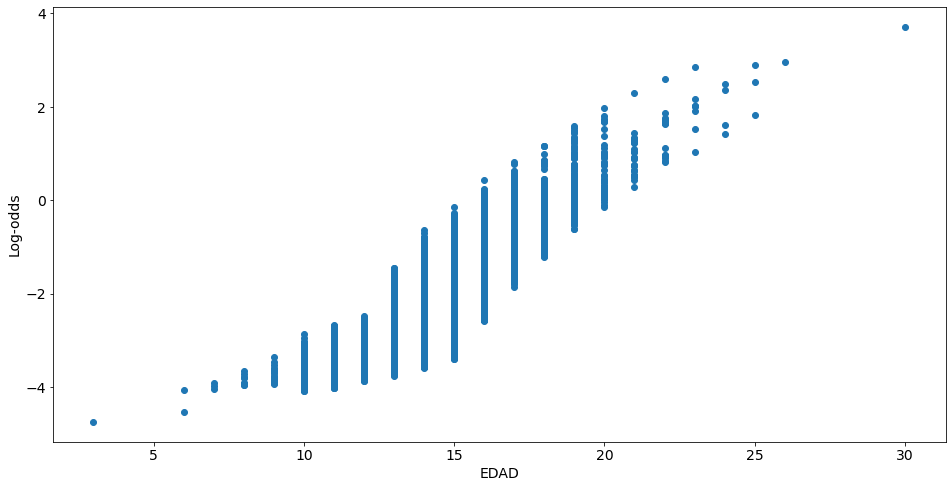

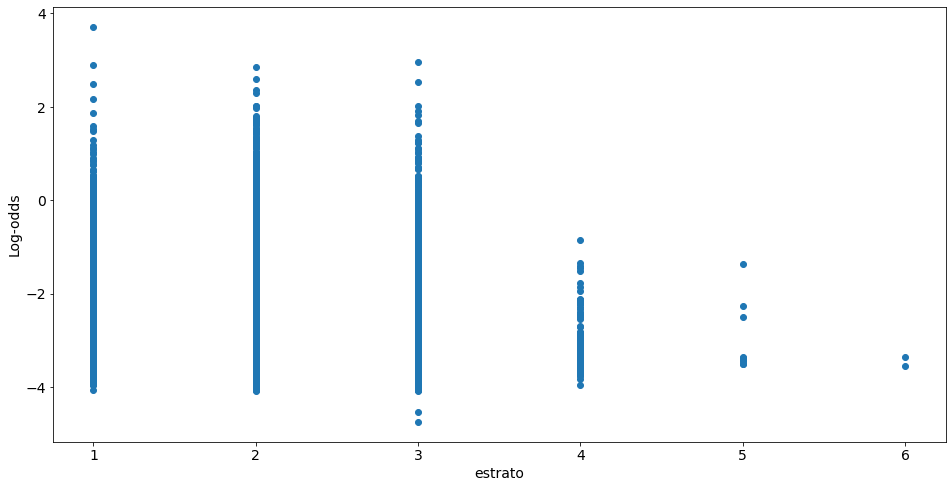

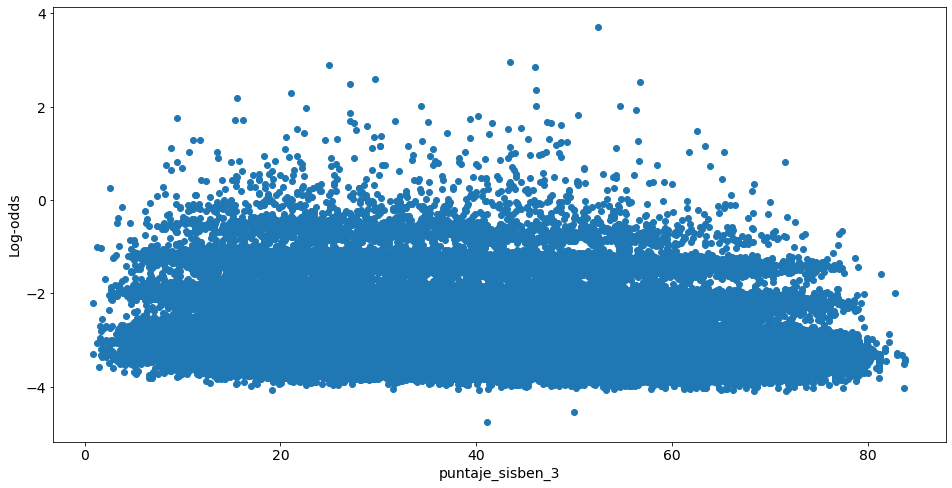

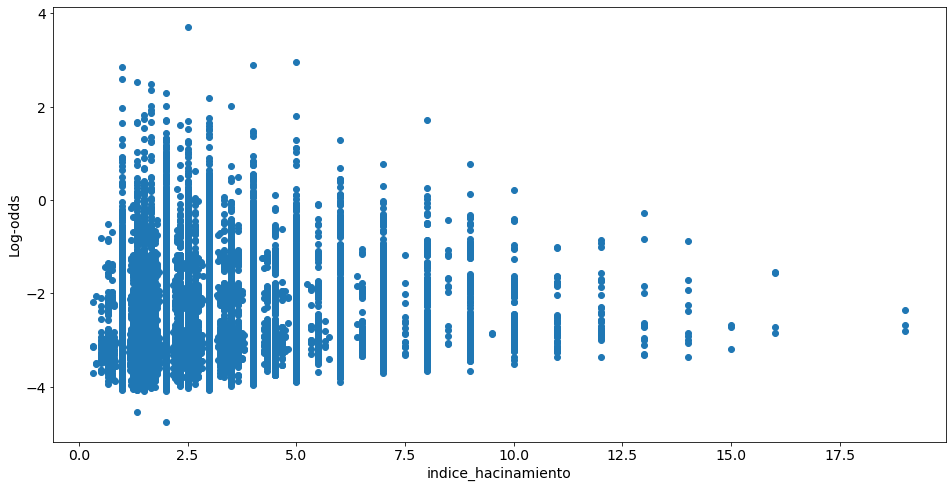

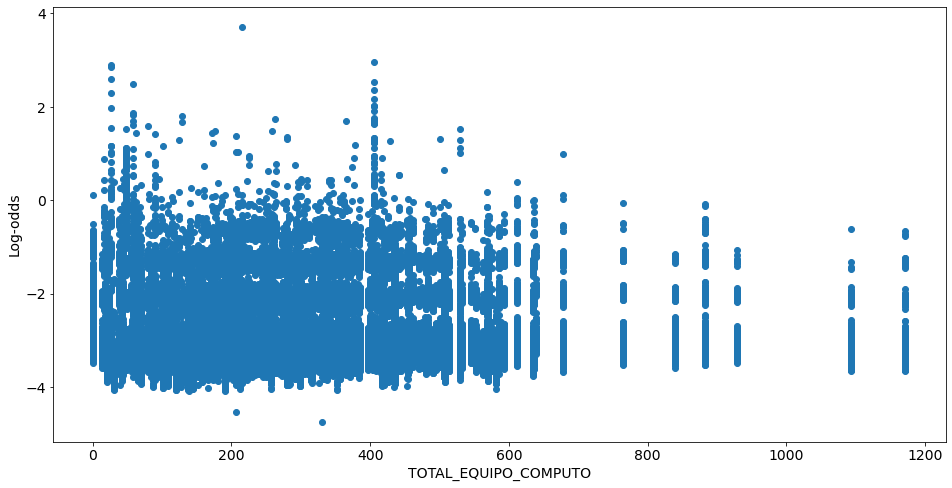

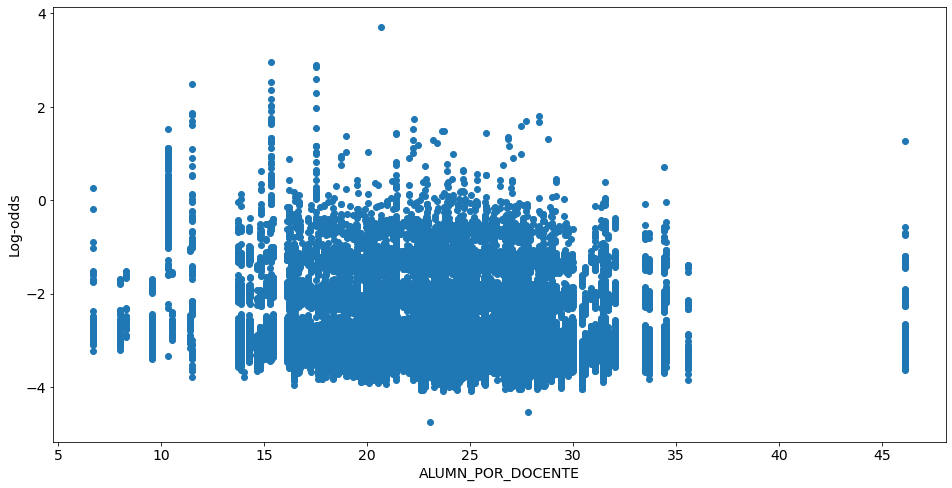

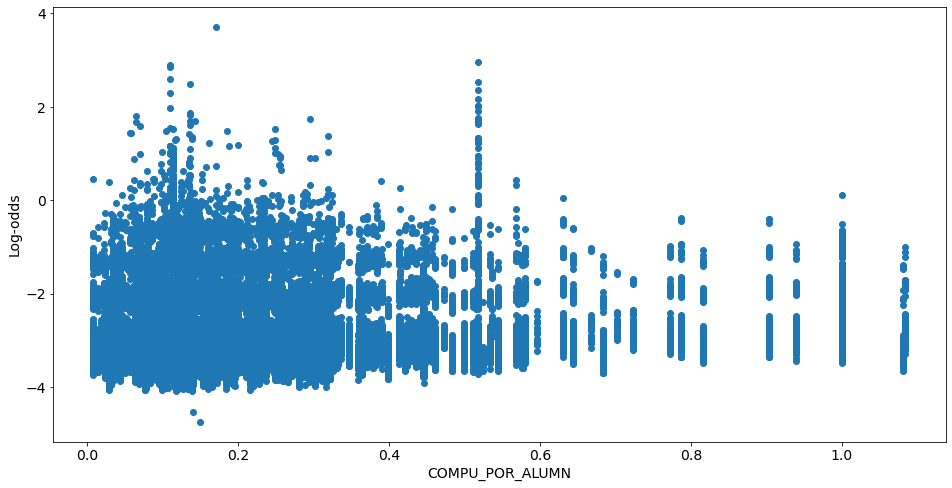

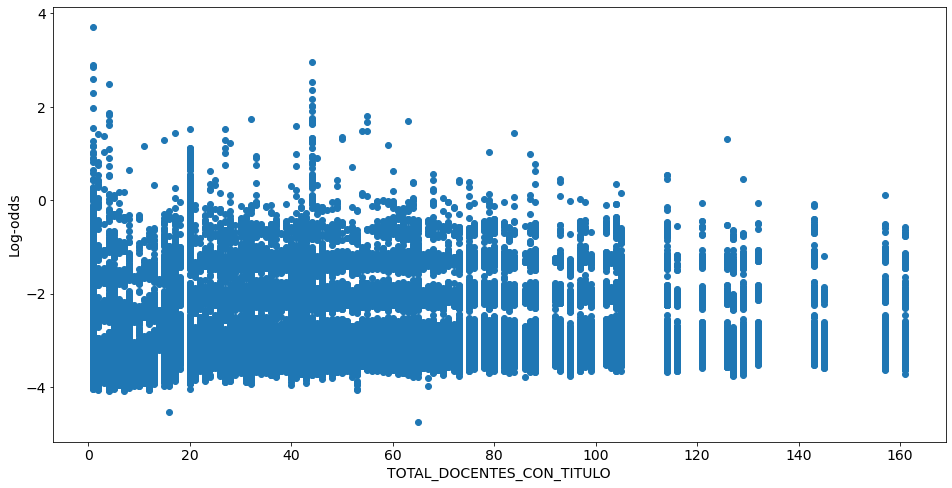

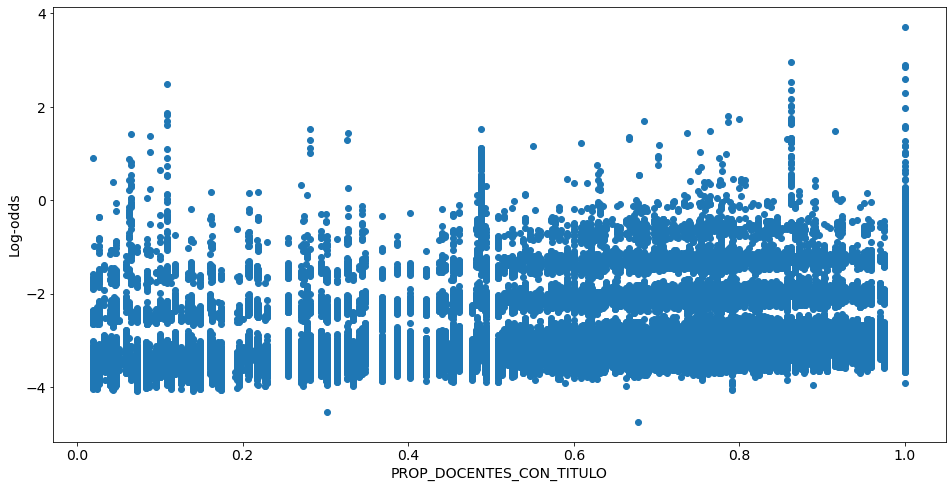

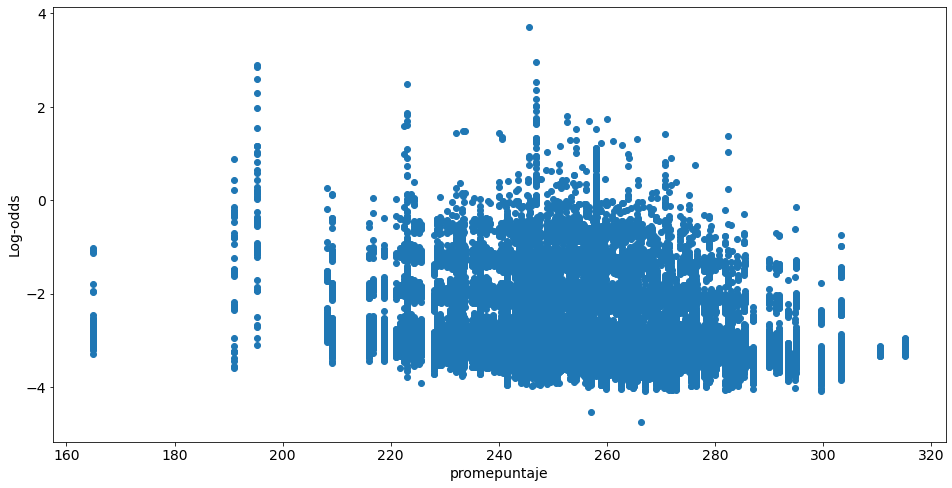

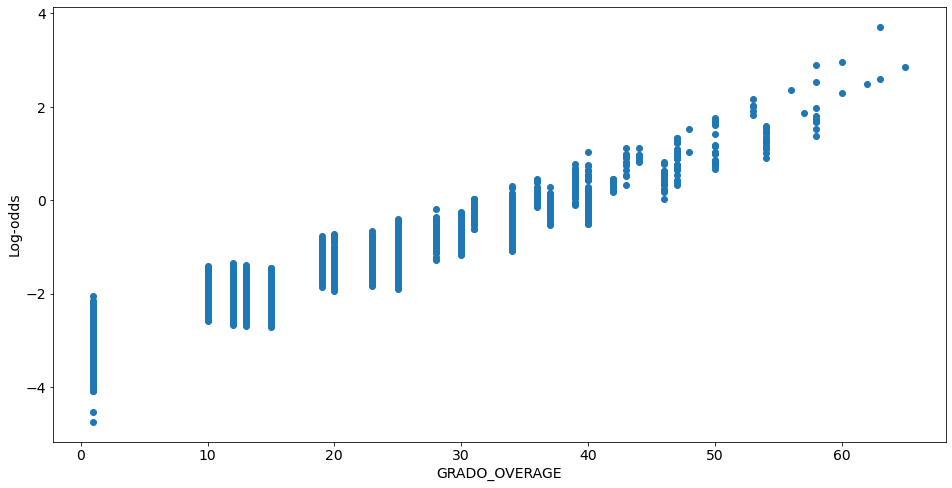

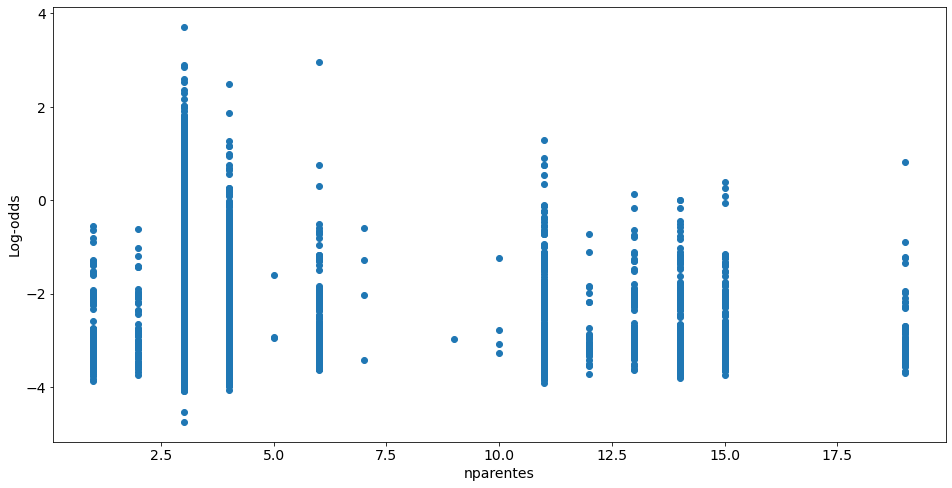

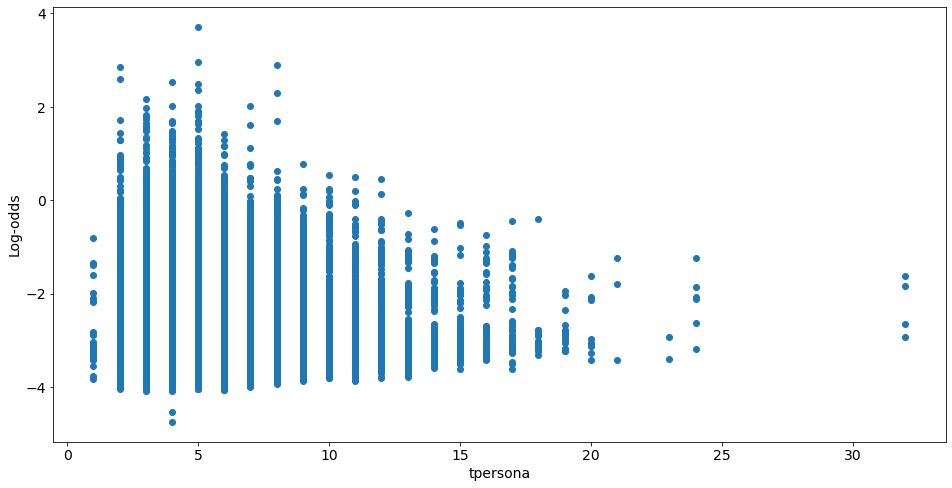

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                            GLM   Df Residuals:                   182047
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36939.
Date:                Wed, 06 Jul 2022   Deviance:                       73877.
Time:                        23:29:15   Pearson chi2:                 1.74e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                       11.3507      0.389     29.157      0.000      10.588      12.114
estrato                                                    -0.7365      0.128     -5.733      0.000      -0.988      -0.485
puntaje_sisben_3                                           -0.0004      0.013     -0.031      0.975      -0.026       0.025
indice_hacinamiento                                         0.1187      0.059      2.005      0.045       0.003       0.235
TOTAL_EQUIPO_COMPUTO                                        0.0067      0.001      4.894      0.000       0.004       0.009
ALUMN_POR_DOCENTE                                           0.5702      0.073      7.759      0.000       0.426       0.714
COMPU_POR_ALUMN                                             0.4434      0.094      4.696      0.000       0.258       0.628
TOTAL_DOCENTES_CON_TITULO                                  -0.0057      0.004     -1.444      0.149      -0.013       0.002
PROP_DOCENTES_CON_TITULO                                    0.5494      0.085      6.442      0.000       0.382       0.717
promepuntaje                                                0.9967      0.121      8.252      0.000       0.760       1.233
GRADO_OVERAGE                                               0.2753      0.010     27.624      0.000       0.256       0.295
nparentes                                                   0.0655      0.125      0.526      0.599      -0.179       0.310
tpersona                                                   -0.0281      0.050     -0.558      0.577      -0.127       0.071
EDAD:Log_EDAD                                              -3.0988      0.107    -28.857      0.000      -3.309      -2.888
estrato:Log_estrato                                         0.4220      0.079      5.352      0.000       0.267       0.577
puntaje_sisben_3:Log_puntaje_sisben_3                   -9.001e-05      0.003     -0.033      0.974      -0.006       0.005
indice_hacinamiento:Log_indice_hacinamiento                -0.0418      0.025     -1.659      0.097      -0.091       0.008
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0011      0.000     -5.544      0.000      -0.001      -0.001
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1398      0.018     -7.925      0.000      -0.174      -0.105
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                        -1.5729      0.272     -5.779      0.000      -2.106      -1.039
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0015      0.001      2.009      0.045    3.78e-05       0.003
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -0.6908      0.170     -4.061      0.000      -1

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

puntaje_sisben_3                               0.975216
TOTAL_DOCENTES_CON_TITULO                      0.148739
nparentes                                      0.598788
tpersona                                       0.576990
puntaje_sisben_3:Log_puntaje_sisben_3          0.974061
indice_hacinamiento:Log_indice_hacinamiento    0.097197
nparentes:Log_nparentes                        0.632725
tpersona:Log_tpersona                          0.654850
dtype: float64

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['puntaje_sisben_3', 'TOTAL_DOCENTES_CON_TITULO', 'nparentes',
       'tpersona', 'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'nparentes:Log_nparentes', 'tpersona:Log_tpersona'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['puntaje_sisben_3', 'indice_hacinamiento', 'nparentes', 'tpersona']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

9

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.202877
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                          Logit   Df Residuals:                   182047
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1078
Time:                        23:29:20   Log-Likelihood:                -36939.
converged:                       True   LL-Null:                       -41401.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     -88.8323      4.911    -18.089      0.000     -98.457     -79.207
EDAD                                                           11.3507      0.389     29.157      0.000      10.588      12.114
EDAD:np.log(EDAD)                                              -3.0988      0.107    -28.857      0.000      -3.309      -2.888
estrato                                                        -0.7365      0.128     -5.733      0.000      -0.988      -0.485
estrato:np.log(estrato)                                         0.4220      0.079      5.352      0.000       0.267       0.577
puntaje_sisben_3                                               -0.0004      0.013     -0.031      0.975      -0.026       0.025
puntaje_sisben_3:np.log(puntaje_sisben_3)                   -8.958e-05      0.003     -0.032      0.974      -0.006       0.005
indice_hacinamiento                                             0.1188      0.059      2.006      0.045       0.003       0.235
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0418      0.025     -1.660      0.097      -0.091       0.008
TOTAL_EQUIPO_COMPUTO                                            0.0067      0.001      4.894      0.000       0.004       0.009
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              -0.0011      0.000     -5.544      0.000      -0.001      -0.001
ALUMN_POR_DOCENTE                                               0.5702      0.073      7.759      0.000       0.426       0.714
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                    -0.1398      0.018     -7.925      0.000      -0.174      -0.105
COMPU_POR_ALUMN                                                 0.4434      0.094      4.696      0.000       0.258       0.628
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                        -1.5729      0.272     -5.779      0.000      -2.106      -1.039
TOTAL_DOCENTES_CON_TITULO                                      -0.0057      0.004     -1.444      0.149      -0.013       0.002
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)     0.0015      0.001      2.009      0.045    3.78e-05       0.003
PROP_DOCENTES_CON_TITULO                                        0.5494      0.085      6.442      0.000       0.382       0.717
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      -0.6908      0.170     -4.061      0.000      -1.024      -0.357
promepuntaje                                                    0.9967      0.121      8.252      0.000       0.760       1.233
promepuntaje:np.log(promepuntaje)                              -0.1532      0.018     -8.283      0.000      -0.189      -0.117
GRADO_OVERAGE                                                   0.2753      0.010     27.624      0.000       0.256       0.295
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

puntaje_sisben_3                                   0.975106
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.974187
indice_hacinamiento:np.log(indice_hacinamiento)    0.096933
TOTAL_DOCENTES_CON_TITULO                          0.148736
nparentes                                          0.598767
nparentes:np.log(nparentes)                        0.632705
tpersona                                           0.576846
tpersona:np.log(tpersona)                          0.654728
dtype: float64

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['puntaje_sisben_3', 'indice_hacinamiento', 'nparentes', 'tpersona']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               182074
Model:                            GLM   Df Residuals:                   182069
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41304.
Date:                Wed, 06 Jul 2022   Deviance:                       82608.
Time:                        23:29:21   Pearson chi2:                 1.82e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0065      0.001     -9.534      0.000      -0.008      -0.005
indice_hacinamiento     0.0220      0.009      2.546      0.011       0.005       0.039
nparentes               0.0129      0.009      1.468      0.142      -0.004       0.030
tpersona                0.0237      0.006      4.105      0.000       0.012       0.035
const                  -2.7072      0.053    -51.544      0.000      -2.810      -2.604
=======================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
381493,0.003445,3.833667
245020,0.003391,3.841171
430585,0.003349,3.736713
35386,0.002146,3.209819
371687,0.002085,3.533224


In [53]:
extreme.index

Int64Index([    73,     77,     83,    156,    168,    183,    186,    187,
               188,    189,
            ...
            453883, 453884, 454098, 454194, 455356, 455364, 455365, 455391,
            455412, 455419],
           dtype='int64', length=10729)

In [54]:
df.index

Int64Index([    12,     27,     29,     30,     31,     32,     33,     35,
                40,     41,
            ...
            457035, 457036, 457037, 457038, 457040, 457042, 457043, 457044,
            457045, 457046],
           dtype='int64', length=182074)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    10729
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([    12,     27,     29,     30,     31,     32,     33,     35,
                40,     41,
            ...
            457035, 457036, 457037, 457038, 457040, 457042, 457043, 457044,
            457045, 457046],
           dtype='int64', length=182074)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


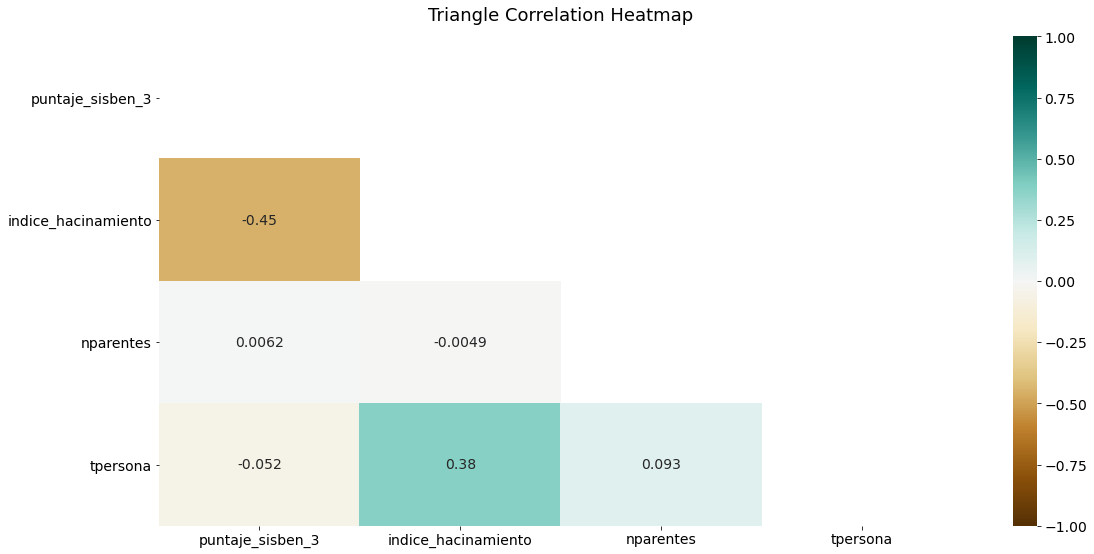

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,puntaje_sisben_3,5.207268
1,indice_hacinamiento,6.031012
2,nparentes,7.346598
3,tpersona,9.130307


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['puntaje_sisben_3', 'indice_hacinamiento', 'tpersona', 'nparentes']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,3
1,CODIGO_ETNIA,1
4,todos_servicios_Pub,1
7,tiene_auto,1
2,CODIGO_JORNADA,0
3,DIR_NUM_LOCALIDAD,0
5,teneviv,0
6,computador,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,3,CODIGO_ETNIA
1,CODIGO_ETNIA,1,todos_servicios_Pub
4,todos_servicios_Pub,1,tiene_auto
7,tiene_auto,1,CODIGO_JORNADA
2,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD
3,DIR_NUM_LOCALIDAD,0,teneviv
5,teneviv,0,computador
6,computador,0,NaN


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,3,CODIGO_ETNIA,4.675781e-01
1,1,CODIGO_ETNIA,1,todos_servicios_Pub,7.223647e-08
2,4,todos_servicios_Pub,1,tiene_auto,8.625099e-61
3,7,tiene_auto,1,CODIGO_JORNADA,2.472638e-11
4,2,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00
5,3,DIR_NUM_LOCALIDAD,0,teneviv,0.000000e+00
6,5,teneviv,0,computador,0.000000e+00
7,6,computador,0,NaN,1.000000e+00


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

1


In [73]:
cat_iid

['GENERO', 'CODIGO_ETNIA']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['puntaje_sisben_3', 'indice_hacinamiento', 'tpersona', 'nparentes']

In [78]:
categorias

['GENERO', 'CODIGO_ETNIA']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,puntaje_sisben_3,indice_hacinamiento,tpersona,nparentes,const,GENERO_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6
12,52.509998,3.0,9,3,1.0,1,0,0,0,0,0,0
27,42.570000,2.0,4,3,1.0,1,0,0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               127451
Model:                            GLM   Df Residuals:                   127439
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28754.
Date:                Wed, 06 Jul 2022   Deviance:                       57508.
Time:                        23:29:29   Pearson chi2:                 1.27e+05
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0067      0.001     -8.242      0.000      -0.008      -0.005
indice_hacinamiento     0.0262      0.010      2.548      0.011       0.006       0.046
tpersona                0.0202      0.007      2.926      0.003       0.007       0.034
nparentes               0.0153      0.010      1.461      0.144      -0.005       0.036
const                  -2.9100      0.064    -45.321      0.000      -3.036      -2.784
GENERO_1                0.3698      0.024     15.418      0.000       0.323       0.417
CODIGO_ETNIA_1          0.2691      0.170      1.584      0.113      -0.064       0.602
CODIGO_ETNIA_2          0.5120      0.165      3.100      0.002       0.188       0.836
CODIGO_ETNIA_3        -17.8058   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
CODIGO_ETNIA_4          1.1447      0.639      1.792      0.073      -0.107       2.397
CODIGO_ETNIA_5          0.2109      0.347      0.608      0.543      -0.469       0.891
CODIGO_ETNIA_6        -18.1905   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
=======================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.059696, G-Mean=0.545


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    28573
1    26050
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[27127 24200]
 [ 1446  1850]]


<AxesSubplot:>

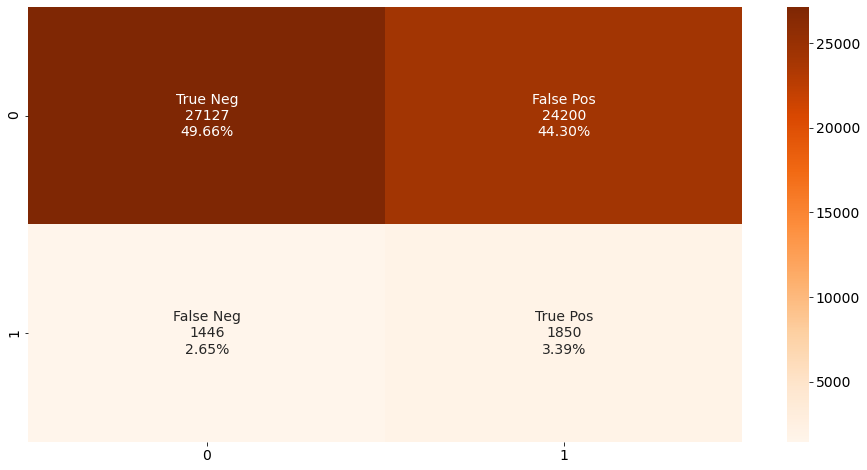

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     51327
           1       0.07      0.56      0.13      3296

    accuracy                           0.53     54623
   macro avg       0.51      0.54      0.40     54623
weighted avg       0.90      0.53      0.65     54623



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,puntaje_sisben_3,indice_hacinamiento,tpersona,nparentes,const,GENERO_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6
12,52.509998,3.0,9,3,1.0,1,0,0,0,0,0,0
27,42.570000,2.0,4,3,1.0,1,0,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               127451
Model:                            GLM   Df Residuals:                 14391.95
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9891.6
Date:                Wed, 06 Jul 2022   Deviance:                       19783.
Time:                        23:29:31   Pearson chi2:                 1.44e+04
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0066      0.001     -5.650      0.000      -0.009      -0.004
indice_hacinamiento     0.0242      0.015      1.605      0.108      -0.005       0.054
tpersona                0.0192      0.010      1.892      0.058      -0.001       0.039
nparentes               0.0167      0.016      1.076      0.282      -0.014       0.047
const                  -0.1542      0.093     -1.650      0.099      -0.337       0.029
GENERO_1                0.3674      0.034     10.899      0.000       0.301       0.433
CODIGO_ETNIA_1         -0.0206      0.271     -0.076      0.939      -0.551       0.510
CODIGO_ETNIA_2          0.2984      0.273      1.093      0.275      -0.237       0.834
CODIGO_ETNIA_3        -18.4600   1.88e+04     -0.001      0.999   -3.68e+04    3.67e+04
CODIGO_ETNIA_4          1.0348      1.183      0.875      0.382      -1.284       3.354
CODIGO_ETNIA_5         -0.1754      0.570     -0.307      0.758      -1.294       0.943
CODIGO_ETNIA_6        -18.8034   1.87e+04     -0.001      0.999   -3.67e+04    3.67e+04
=======================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.500866, G-Mean=0.551


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[27605 23725]
 [ 1434  1859]]


<AxesSubplot:>

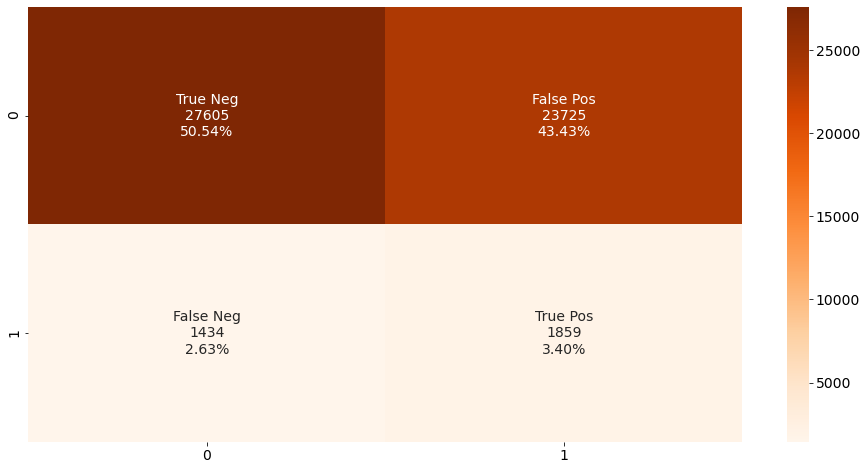

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69     51330
           1       0.07      0.56      0.13      3293

    accuracy                           0.54     54623
   macro avg       0.51      0.55      0.41     54623
weighted avg       0.90      0.54      0.65     54623



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,puntaje_sisben_3,indice_hacinamiento,tpersona,nparentes,const,GENERO_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_4,CODIGO_ETNIA_5
366060,48.730000,1.5,3,3,1.0,1,0,0,0,0
3042,68.669998,1.5,3,3,1.0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

0    7693
1    7639
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                15332
Model:                            GLM   Df Residuals:                    15322
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10527.
Date:                Wed, 06 Jul 2022   Deviance:                       21054.
Time:                        23:29:33   Pearson chi2:                 1.53e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0061      0.001     -5.408      0.000      -0.008      -0.004
indice_hacinamiento    -0.0018      0.015     -0.121      0.903      -0.030       0.027
tpersona                0.0365      0.010      3.687      0.000       0.017       0.056
nparentes              -0.0035      0.015     -0.236      0.814      -0.032       0.025
const                  -0.1363      0.090     -1.509      0.131      -0.313       0.041
GENERO_1                0.3909      0.033     11.961      0.000       0.327       0.455
CODIGO_ETNIA_1          0.1632      0.274      0.596      0.551      -0.374       0.700
CODIGO_ETNIA_2          0.4154      0.269      1.544      0.123      -0.112       0.943
CODIGO_ETNIA_4          0.6287      0.869      0.723      0.470      -1.075       2.332
CODIGO_ETNIA_5          0.2921      0.507      0.576      0.565      -0.702       1.286
=======================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.516219, G-Mean=0.554


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[2006 1253]
 [1665 1648]]


<AxesSubplot:>

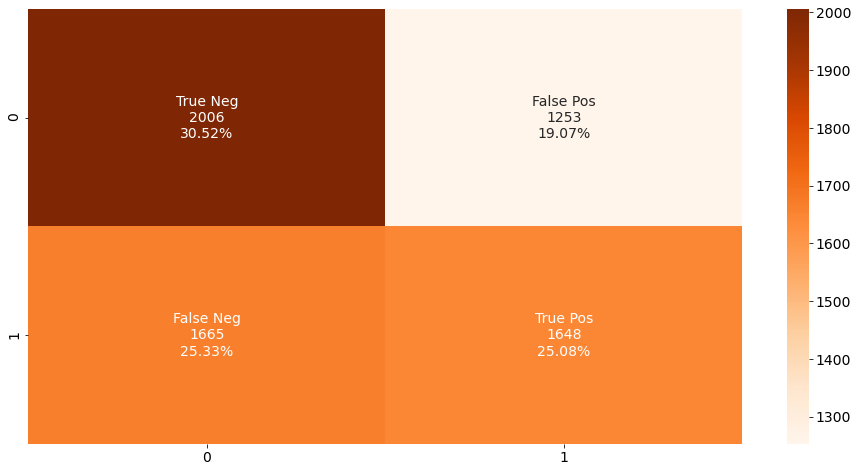

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58      3259
           1       0.57      0.50      0.53      3313

    accuracy                           0.56      6572
   macro avg       0.56      0.56      0.55      6572
weighted avg       0.56      0.56      0.55      6572



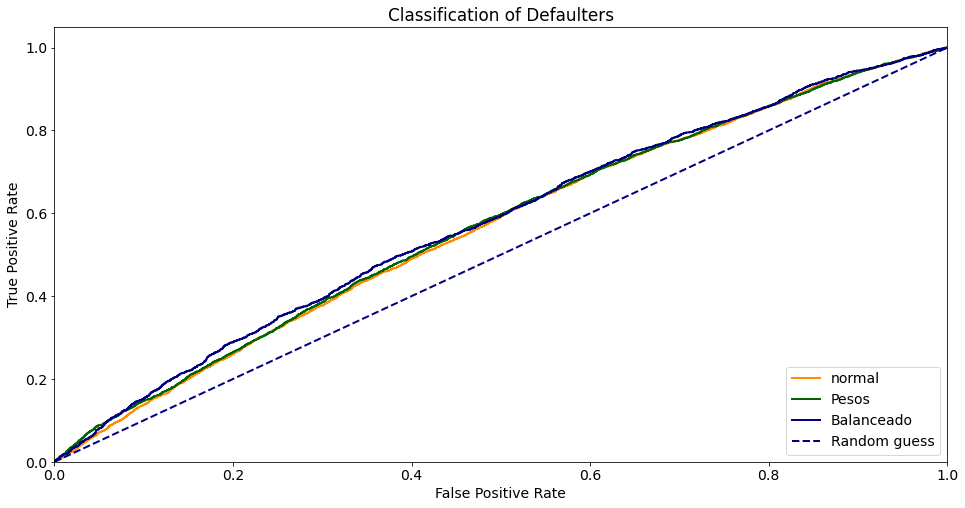

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.5634735934748096
AUC of the model pesos  0.5675056671996499
AUC of the model balanceado  0.5742905457565467


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica Balanceada


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['puntaje_sisben_3', 'indice_hacinamiento', 'tpersona', 'nparentes']

In [123]:
categorias

['GENERO', 'CODIGO_ETNIA']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

2

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [126]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2020
tab['nivel'] = 'Secundaria'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,puntaje_sisben_3,-0.006720,1.696560e-16,2020,Secundaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.026223,1.084395e-02,2020,Secundaria,Regresion Logistica Simple,No
2,tpersona,0.020232,3.437977e-03,2020,Secundaria,Regresion Logistica Simple,No
3,nparentes,0.015264,1.440342e-01,2020,Secundaria,Regresion Logistica Simple,No
4,const,-2.910048,0.000000e+00,2020,Secundaria,Regresion Logistica Simple,No
5,GENERO_1,0.369792,1.232873e-53,2020,Secundaria,Regresion Logistica Simple,No
6,CODIGO_ETNIA_1,0.269136,1.132058e-01,2020,Secundaria,Regresion Logistica Simple,No
7,CODIGO_ETNIA_2,0.511972,1.936433e-03,2020,Secundaria,Regresion Logistica Simple,No
8,CODIGO_ETNIA_3,-17.805849,9.991987e-01,2020,Secundaria,Regresion Logistica Simple,No
9,CODIGO_ETNIA_4,1.144732,7.312453e-02,2020,Secundaria,Regresion Logistica Simple,No


In [127]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [128]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [133]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,puntaje_sisben_3,-0.006720,Si,2020,Secundaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.026223,Si,2020,Secundaria,Regresion Logistica Simple,No
2,tpersona,0.020232,Si,2020,Secundaria,Regresion Logistica Simple,No
3,nparentes,0.015264,No,2020,Secundaria,Regresion Logistica Simple,No
4,const,-2.910048,Si,2020,Secundaria,Regresion Logistica Simple,No
5,GENERO_1,0.369792,Si,2020,Secundaria,Regresion Logistica Simple,No
6,CODIGO_ETNIA_1,0.269136,No,2020,Secundaria,Regresion Logistica Simple,No
7,CODIGO_ETNIA_2,0.511972,Si,2020,Secundaria,Regresion Logistica Simple,No
8,CODIGO_ETNIA_3,-17.805849,No,2020,Secundaria,Regresion Logistica Simple,No
9,CODIGO_ETNIA_4,1.144732,No,2020,Secundaria,Regresion Logistica Simple,No


In [134]:
tab.to_csv('../data/3-oro/t19s.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,puntaje_sisben_3,-0.006588
1,indice_hacinamiento,0.024212
2,tpersona,0.019177
3,nparentes,0.016718
4,const,-0.154179
5,GENERO_1,0.367377
6,CODIGO_ETNIA_1,-0.020604
7,CODIGO_ETNIA_2,0.298358
8,CODIGO_ETNIA_3,-18.460023
9,CODIGO_ETNIA_4,1.034776


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,puntaje_sisben_3,-0.006098
1,indice_hacinamiento,-0.001773
2,tpersona,0.036471
3,nparentes,-0.003472
4,const,-0.136289
5,GENERO_1,0.390876
6,CODIGO_ETNIA_1,0.163241
7,CODIGO_ETNIA_2,0.415400
8,CODIGO_ETNIA_4,0.628660
9,CODIGO_ETNIA_5,0.292120


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [135]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [136]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
12,16,3,52.509998,3.0,231,23.222222,0.368421,24,0.888889,262.909091,10,3,9,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
27,14,3,42.570000,2.0,231,23.222222,0.368421,24,0.888889,262.909091,13,3,4,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [137]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [138]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               127451
Model:                            GLM   Df Residuals:                   127388
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26290.
Date:                Thu, 07 Jul 2022   Deviance:                       52580.
Time:                        12:12:10   Pearson chi2:                 1.22e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1544      0.009     16.448      0.000       0.136       0.173
estrato                       0.0166      0.023      0.722      0.470      -0.028       0.062
puntaje_sisben_3             -0.0001      0.001     -0.124      0.901      -0.002       0.002
indice_hacinamiento           0.0182      0.011      1.662      0.097      -0.003       0.040
TOTAL_EQUIPO_COMPUTO         -0.0003      0.000     -2.493      0.013      -0.001   -6.46e-05
ALUMN_POR_DOCENTE            -0.0150      0.004     -4.069      0.000      -0.022      -0.008
COMPU_POR_ALUMN               0.7988      0.182      4.401      0.000       0.443       1.155
TOTAL_DOCENTES_CON_TITULO     0.0017      0.001      2.610      0.009       0.000       0.003
PROP_DOCENTES_CON_TITULO      0.2561      0.070      3.654      0.000       0.119       0.394
promepuntaje                  0.0036      0.001      3.353      0.001       0.001       0.006
GRADO_OVERAGE                 0.0741      0.002     43.626      0.000       0.071       0.077
nparentes                    -0.0008      0.011     -0.069      0.945      -0.023       0.021
tpersona                      0.0045      0.008      0.594      0.552      -0.010       0.019
const                       -50.0620   3.75e+04     -0.001      0.999   -7.36e+04    7.35e+04
GENERO_1                      0.2179      0.025      8.785      0.000       0.169       0.267
POB_VICT_CONF_1              -0.0453      0.064     -0.705      0.481      -0.171       0.081
PROVIENE_OTR_MUN_1           -0.1715      0.133     -1.294      0.196      -0.431       0.088
TIPO_DISCAPACIDAD_1          -1.3363      0.079    -16.874      0.000      -1.491      -1.181
CODIGO_ETNIA_1               -0.0555      0.194     -0.286      0.775      -0.436       0.325
CODIGO_ETNIA_2                0.1717      0.176      0.977      0.328      -0.173       0.516
CODIGO_ETNIA_3                0.2105   1.53e+05   1.38e-06      1.000      -3e+05       3e+05
CODIGO_ETNIA_4                0.8062      0.658      1.226      0.220      -0.483       2.095
CODIGO_ETNIA_5               -0.5135      0.435     -1.180      0.238      -1.366       0.339
CODIGO_ETNIA_6              -22.0797   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
CODIGO_JORNADA_2             21.9867   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
CODIGO_JORNADA_3             21.9328   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
CODIGO_JORNADA_6             21.6241   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
DIR_NUM_LOCALIDAD_2          -0.0048      0.185     -0.026      0.979      -0.367       0.357
DIR_NUM_LOCALIDAD_3          -0.8581      0.154     -5.571      0.000      -1.160      -0.556
DIR_NUM_LOCALIDAD_4          -0.5332      0.079     -6.715      0.000      

In [140]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.055543, G-Mean=0.686


In [141]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [142]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [143]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[37526 13857]
 [ 1152  2088]]


<AxesSubplot:>

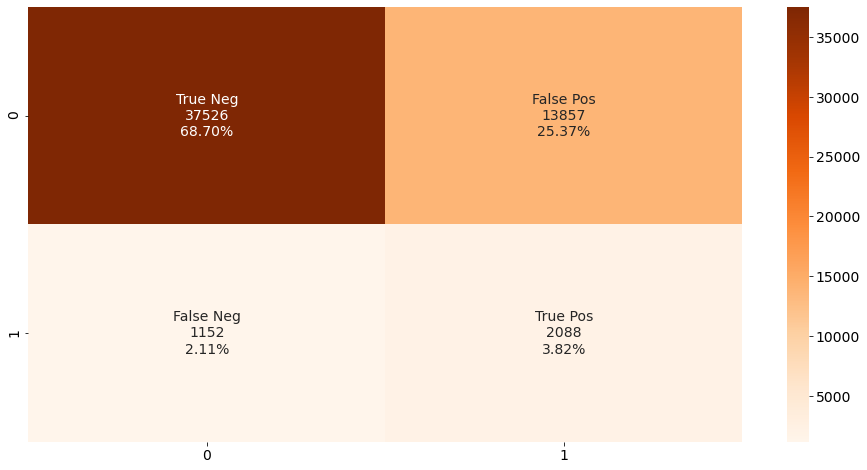

In [144]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [145]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     51383
           1       0.13      0.64      0.22      3240

    accuracy                           0.73     54623
   macro avg       0.55      0.69      0.53     54623
weighted avg       0.92      0.73      0.80     54623



----------------------------

### Model with all variables with weights

In [146]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [158]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [148]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
12,16,3,52.509998,3.0,231,23.222222,0.368421,24,0.888889,262.909091,10,3,9,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
27,14,3,42.570000,2.0,231,23.222222,0.368421,24,0.888889,262.909091,13,3,4,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [156]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [159]:
pesos = y_train_w_all.apply(pesos)

In [160]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               127451
Model:                            GLM   Df Residuals:                 14403.53
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8650.7
Date:                Thu, 07 Jul 2022   Deviance:                       17301.
Time:                        12:18:43   Pearson chi2:                 1.54e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.2597      0.015     17.406      0.000       0.230       0.289
estrato                       0.0084      0.035      0.239      0.811      -0.060       0.077
puntaje_sisben_3             -0.0010      0.001     -0.771      0.441      -0.004       0.002
indice_hacinamiento           0.0322      0.017      1.889      0.059      -0.001       0.066
TOTAL_EQUIPO_COMPUTO         -0.0001      0.000     -0.686      0.493      -0.000       0.000
ALUMN_POR_DOCENTE            -0.0253      0.006     -4.358      0.000      -0.037      -0.014
COMPU_POR_ALUMN               0.6336      0.286      2.213      0.027       0.072       1.195
TOTAL_DOCENTES_CON_TITULO     0.0006      0.001      0.637      0.524      -0.001       0.003
PROP_DOCENTES_CON_TITULO      0.2909      0.104      2.806      0.005       0.088       0.494
promepuntaje                  0.0024      0.002      1.425      0.154      -0.001       0.006
GRADO_OVERAGE                 0.0733      0.003     25.092      0.000       0.068       0.079
nparentes                     0.0236      0.017      1.405      0.160      -0.009       0.057
tpersona                     -0.0049      0.012     -0.427      0.670      -0.028       0.018
const                       -47.5096   3.15e+04     -0.002      0.999   -6.19e+04    6.18e+04
GENERO_1                      0.2805      0.037      7.582      0.000       0.208       0.353
POB_VICT_CONF_1               0.0014      0.098      0.014      0.989      -0.191       0.194
PROVIENE_OTR_MUN_1           -0.1391      0.199     -0.698      0.485      -0.530       0.251
TIPO_DISCAPACIDAD_1          -1.0319      0.120     -8.571      0.000      -1.268      -0.796
CODIGO_ETNIA_1                0.0047      0.294      0.016      0.987      -0.571       0.581
CODIGO_ETNIA_2                0.1870      0.292      0.640      0.522      -0.386       0.760
CODIGO_ETNIA_3                0.1445   1.37e+05   1.05e-06      1.000   -2.69e+05    2.69e+05
CODIGO_ETNIA_4                1.1303      1.341      0.843      0.399      -1.499       3.759
CODIGO_ETNIA_5                0.0691      0.580      0.119      0.905      -1.068       1.206
CODIGO_ETNIA_6             6.144e-09   1.09e-05      0.001      1.000   -2.14e-05    2.14e-05
CODIGO_JORNADA_2             21.4998   1.45e+04      0.001      0.999   -2.85e+04    2.85e+04
CODIGO_JORNADA_3             21.5439   1.45e+04      0.001      0.999   -2.85e+04    2.85e+04
CODIGO_JORNADA_6             21.1278   1.45e+04      0.001      0.999   -2.85e+04    2.85e+04
DIR_NUM_LOCALIDAD_2          -0.0483      0.310     -0.156      0.876      -0.655       0.559
DIR_NUM_LOCALIDAD_3          -0.7995      0.221     -3.623      0.000      -1.232      -0.367
DIR_NUM_LOCALIDAD_4          -0.5550      0.123     -4.494      0.000      

In [161]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.453648, G-Mean=0.684


In [162]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [163]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [164]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[35013 16387]
 [ 1013  2210]]


<AxesSubplot:>

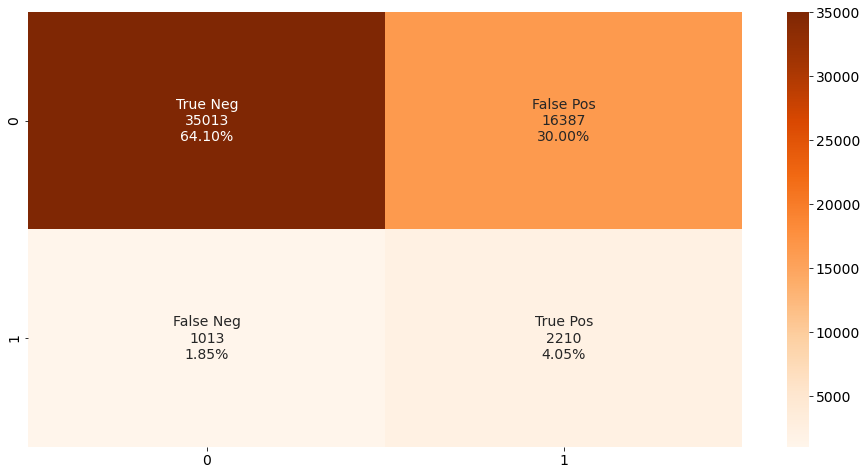

In [165]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     51400
           1       0.12      0.69      0.20      3223

    accuracy                           0.68     54623
   macro avg       0.55      0.68      0.50     54623
weighted avg       0.92      0.68      0.77     54623



## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions